In [1]:
from flipper import liteMap
import matplotlib.pyplot as plt
import numpy as np
from cactusLib import filterLib

/home/cvargas/.local/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
#Marsden Area

RA0 = 3.
RA1 = 106.75
DEC0 = -56.2
DEC1 = -49.0


lt = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_1way_v3_srcfree.fits")

ltw = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_1way_hits_v3.fits")

lt = lt.selectSubMap(RA0,RA1,DEC0,DEC1)
ltw = ltw.selectSubMap(RA0,RA1,DEC0,DEC1)

lt.data = lt.data*ltw.data

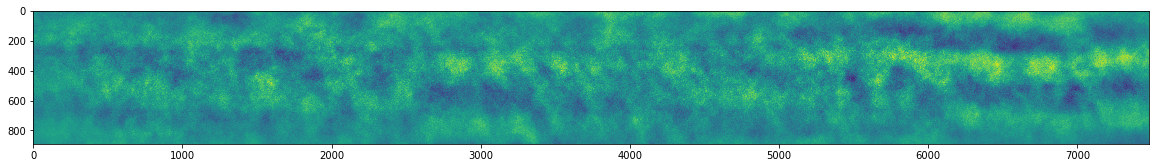

In [3]:
plt.figure(figsize=(20,15))
plt.imshow(lt.data)

In [4]:
lt_std = np.std(lt.data)
lt_std

23019164.749387406

(array([1.100000e+01, 3.200000e+01, 2.090000e+02, 1.052000e+03,
        4.265000e+03, 1.448900e+04, 4.054100e+04, 9.687300e+04,
        2.027340e+05, 3.768630e+05, 6.513590e+05, 9.857040e+05,
        1.169209e+06, 1.103994e+06, 8.318130e+05, 5.356930e+05,
        3.179270e+05, 1.706160e+05, 8.776500e+04, 4.212100e+04,
        1.754700e+04, 5.733000e+03, 1.329000e+03, 1.920000e+02,
        1.900000e+01]),
 array([-1.19898603e+08, -1.10429115e+08, -1.00959627e+08, -9.14901393e+07,
        -8.20206515e+07, -7.25511636e+07, -6.30816757e+07, -5.36121879e+07,
        -4.41427000e+07, -3.46732121e+07, -2.52037243e+07, -1.57342364e+07,
        -6.26474853e+06,  3.20473934e+06,  1.26742272e+07,  2.21437151e+07,
         3.16132029e+07,  4.10826908e+07,  5.05521787e+07,  6.00216665e+07,
         6.94911544e+07,  7.89606423e+07,  8.84301301e+07,  9.78996180e+07,
         1.07369106e+08,  1.16838594e+08]),
 <a list of 25 Patch objects>)

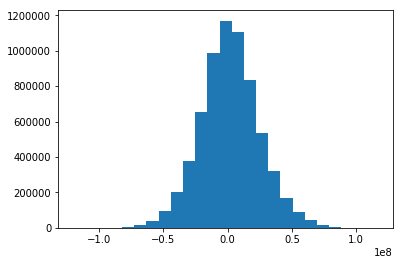

In [5]:
plt.hist(lt.data.flatten(),25)

In [6]:
ft_lt = np.fft.fft2(lt.data)

In [7]:
a = np.abs(ft_lt)

In [8]:
Ny,Nx = lt.data.shape

In [24]:
def new_realization(a,i):
    #New angles
    thetas = np.random.uniform(-np.pi,np.pi,(Ny,Nx))
    #New fft
    M_fft2 = a*(np.exp(1j*thetas))
    #Symmetrizing
    M_fft2 = filterLib.symmetrizeFFT(M_fft2)
    #real part of ifft
    M = np.real(np.fft.ifft2(M_fft2))
    #plotting
    plt.figure(figsize=(20,15))
    plt.imshow(M)
    #standard deviation
    M_std = np.std(M)
    print "Realization {}".format(i)
    print "M_std = {}".format(M_std)
    print "lt_std/M_std = {}".format(lt_std/M_std)
    print " "

Realization 0
M_std = 16472240.7747
lt_std/M_std = 1.39745193531
 
Realization 1
M_std = 16042842.9718
lt_std/M_std = 1.43485570419
 
Realization 2
M_std = 17064560.3763
lt_std/M_std = 1.34894566528
 
Realization 3
M_std = 16401705.5346
lt_std/M_std = 1.40346165225
 
Realization 4
M_std = 17354745.4986
lt_std/M_std = 1.32639022285
 
Realization 5
M_std = 16357197.1496
lt_std/M_std = 1.40728051015
 
Realization 6
M_std = 15476221.181
lt_std/M_std = 1.48738923282
 
Realization 7
M_std = 15808863.5012
lt_std/M_std = 1.4560923211
 
Realization 8
M_std = 16209686.7475
lt_std/M_std = 1.42008695837
 
Realization 9
M_std = 14900686.8969
lt_std/M_std = 1.54483916807
 


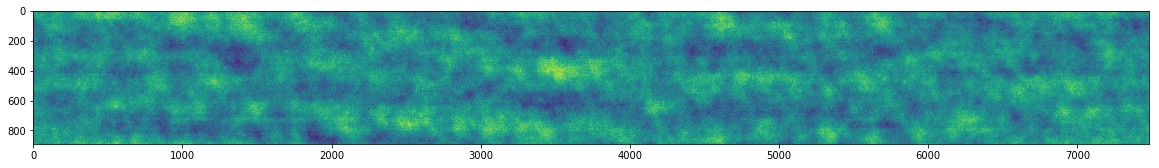

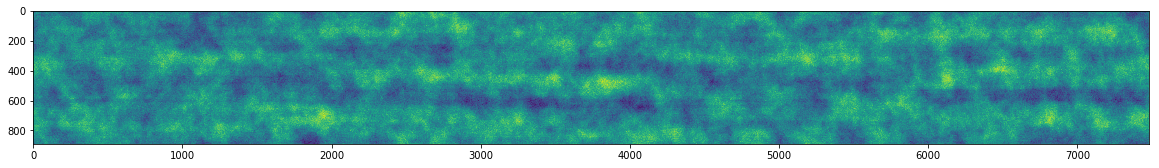

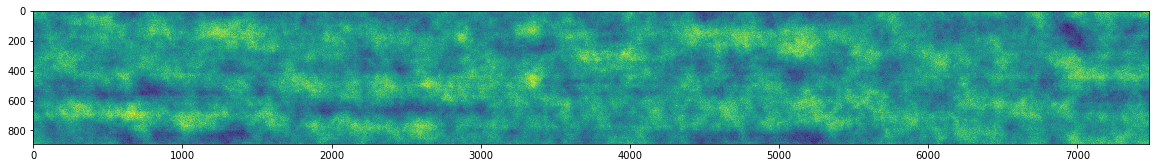

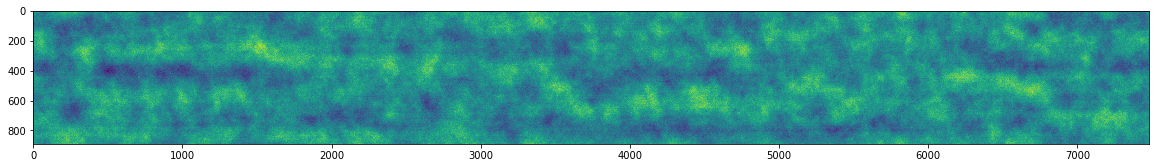

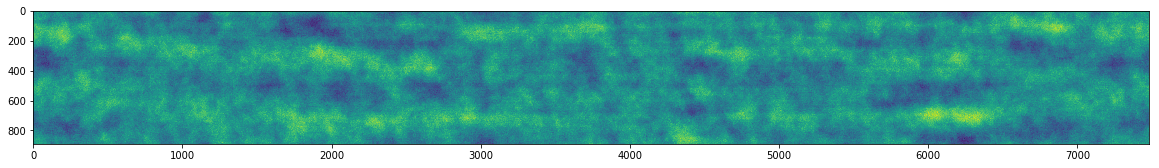

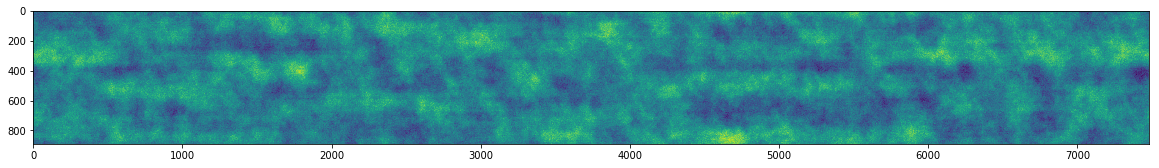

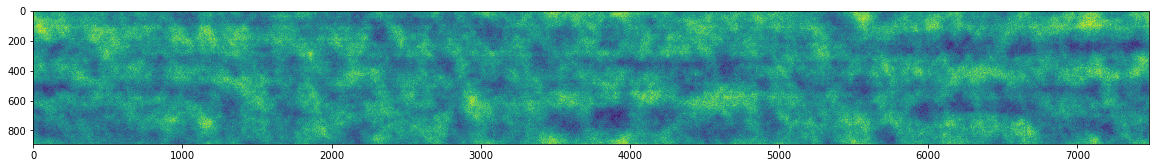

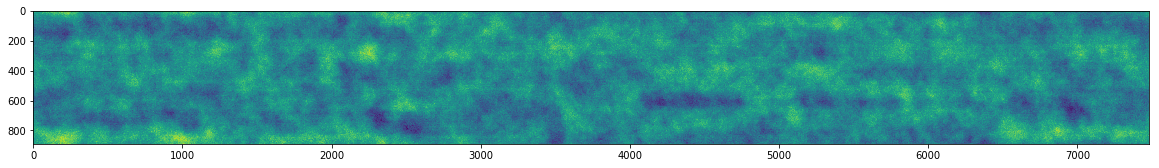

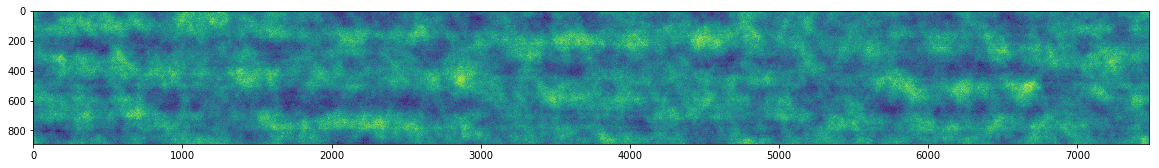

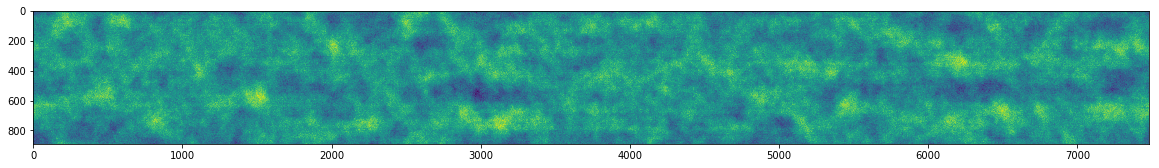

In [25]:
for i in range(10):
    new_realization(a,i)